In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import LinearSVC
from sklearn import metrics



In [4]:
df = pd.read_csv('datasets/dataset-full.csv' , lineterminator='\n')
df.head()

,date,text,side,label
0,2022-01-27,Medvedev sees no need to review Russia’s nucle...,r,W
1,2022-01-27,/TASS/.,r,W
2,2022-01-27,There is no need to review Russia’s nuclear do...,r,W
3,2022-01-27,"""As for reviewing the nuclear doctrine, I don’...",r,W
4,2022-01-27,Medvedev explained that all the necessary aspe...,r,W


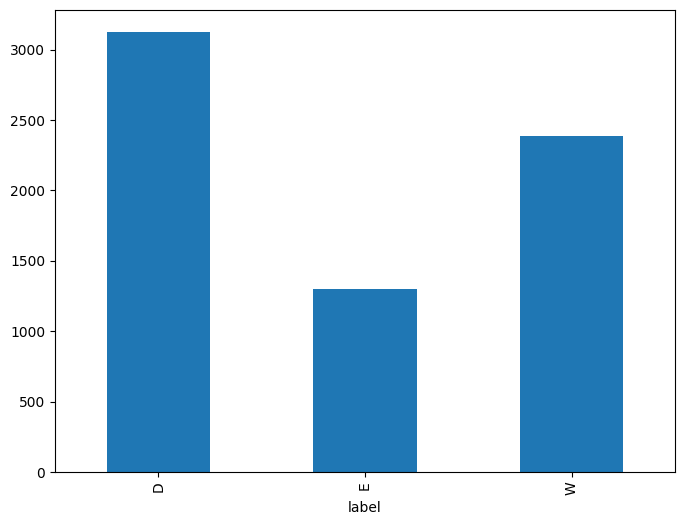

In [12]:
fig = plt.figure(figsize=(8,6))
df.groupby('label')['text'].count().plot.bar(ylim=0)
plt.show()

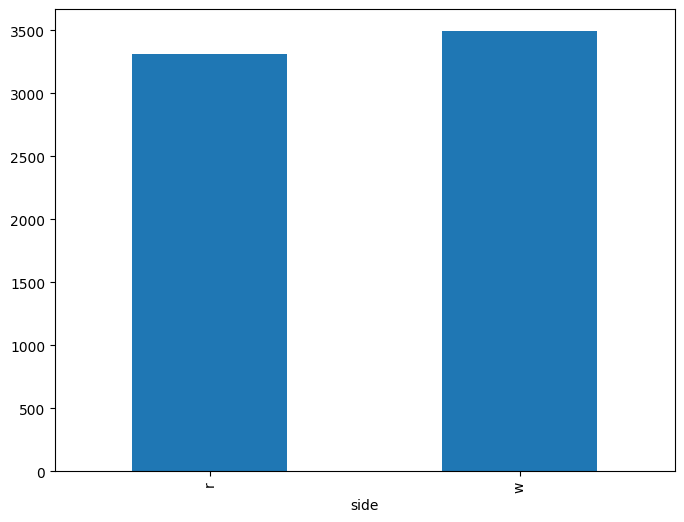

In [11]:
fig = plt.figure(figsize=(8,6))
df.groupby('side')['text'].count().plot.bar(ylim=0)
plt.show()

In [37]:
# TF-IDF for label

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df['text']).toarray()
labels = df['label']
side = df['side']
features.shape


(6809, 2777)

In [38]:
# Training to predict labels

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=labels.unique()))


              precision    recall  f1-score   support

           W       0.63      0.68      0.65       636
           E       0.49      0.38      0.43       263
           D       0.55      0.56      0.56       463

    accuracy                           0.58      1362
   macro avg       0.56      0.54      0.55      1362
weighted avg       0.58      0.58      0.58      1362



In [31]:
# Training to predict sides

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, side, df.index, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=side.unique()))


              precision    recall  f1-score   support

           r       0.79      0.78      0.78       665
           w       0.79      0.80      0.80       697

    accuracy                           0.79      1362
   macro avg       0.79      0.79      0.79      1362
weighted avg       0.79      0.79      0.79      1362



## Try balancing the dataset

# Running for dataset-medium.csv

In [39]:
df = pd.read_csv('datasets/dataset-medium.csv' , lineterminator='\n')
df.head()

,date,text,side,label
0,2022-01-27 00:00:00,"A month before the invasion, the Russian leade...",r,W
1,2022-01-27 00:00:00,"Dmitry\r Medvedev, the Deputy Chairman of the ...",r,W
2,2022-01-27 00:00:00,Moscow had “the right” to use strategic nuclea...,r,W
3,2022-01-27 00:00:00,This was “a\r comprehensive formula” that made...,r,W
4,2022-02-07 00:00:00,"Ten days later, Putin continued developing the...",r,E


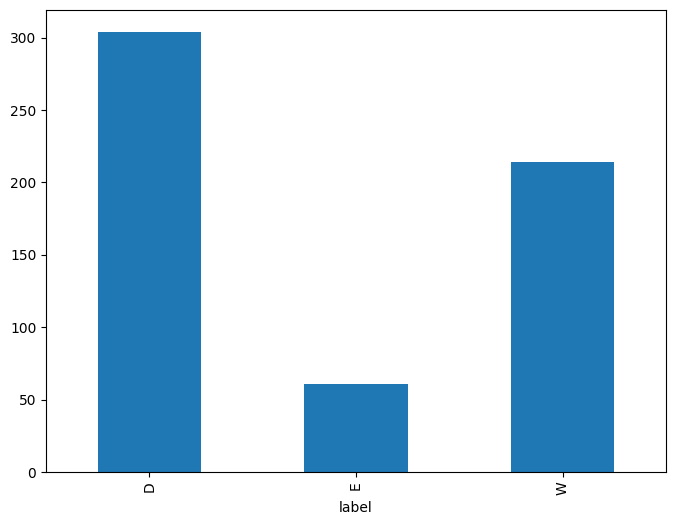

In [40]:
fig = plt.figure(figsize=(8,6))
df.groupby('label')['text'].count().plot.bar(ylim=0)
plt.show()

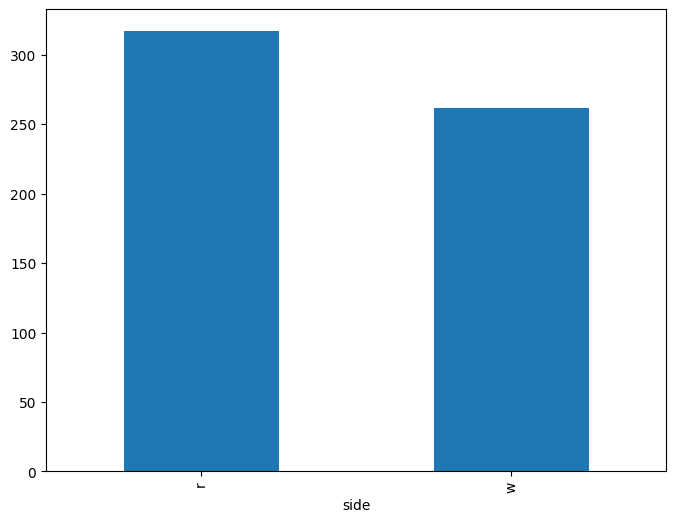

In [41]:
fig = plt.figure(figsize=(8,6))
df.groupby('side')['text'].count().plot.bar(ylim=0)
plt.show()

In [42]:
# TF-IDF for label

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df['text']).toarray()
labels = df['label']
side = df['side']
features.shape


(579, 327)

In [43]:
# Training to predict labels

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=labels.unique()))


              precision    recall  f1-score   support

           W       0.58      0.70      0.63        66
           E       0.17      0.10      0.12        10
           D       0.39      0.30      0.34        40

    accuracy                           0.51       116
   macro avg       0.38      0.37      0.37       116
weighted avg       0.48      0.51      0.49       116



In [44]:
# Training to predict sides

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, side, df.index, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=side.unique()))


              precision    recall  f1-score   support

           r       0.76      0.81      0.79        64
           w       0.75      0.69      0.72        52

    accuracy                           0.76       116
   macro avg       0.76      0.75      0.75       116
weighted avg       0.76      0.76      0.76       116



## Running for dataset-short.csv

In [45]:
df = pd.read_csv('datasets/dataset-short.csv' , lineterminator='\n')
df.head()

,date,text,side,label
0,2022-01-27 00:00:00,Medvedev: Russia has “the right” to use nuclea...,r,W
1,2022-02-07 00:00:00,Putin: If Ukraine attempts to take back Crimea...,r,E
2,2022-02-19 00:00:00,"Yearly nuclear exercise, normally held in autumn.",r,W
3,2022-02-22 00:00:00,Putin: Ukraine is seeking to acquire tactical ...,r,W
4,2022-02-24 00:00:00,Putin: Whoever tries to hinder Russia will fac...,r,E


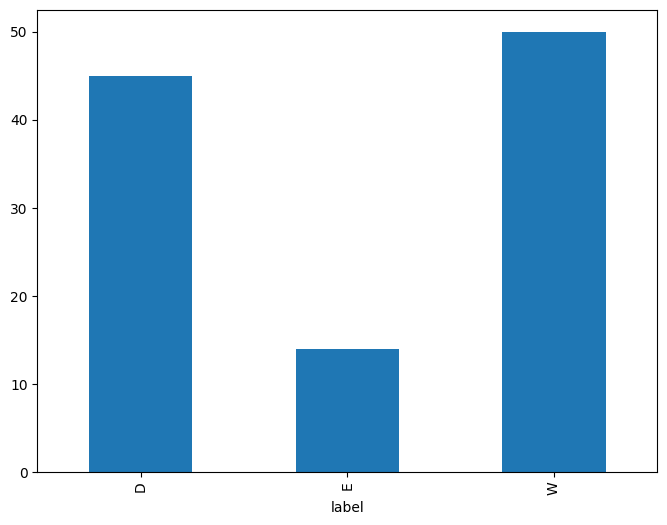

In [46]:
fig = plt.figure(figsize=(8,6))
df.groupby('label')['text'].count().plot.bar(ylim=0)
plt.show()

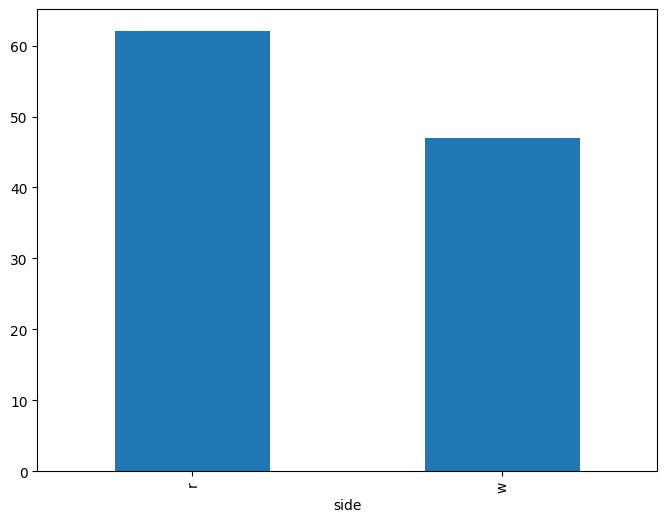

In [47]:
fig = plt.figure(figsize=(8,6))
df.groupby('side')['text'].count().plot.bar(ylim=0)
plt.show()

In [48]:
# TF-IDF for label

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df['text']).toarray()
labels = df['label']
side = df['side']
features.shape


(109, 32)

In [49]:
# Training to predict labels

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=labels.unique()))


              precision    recall  f1-score   support

           W       0.50      0.60      0.55        10
           E       0.00      0.00      0.00         2
           D       0.50      0.50      0.50        10

    accuracy                           0.50        22
   macro avg       0.33      0.37      0.35        22
weighted avg       0.45      0.50      0.48        22



/Users/roman_sv/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/roman_sv/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/roman_sv/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [50]:
# Training to predict labels

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, side, df.index, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=side.unique()))


              precision    recall  f1-score   support

           r       0.73      0.73      0.73        15
           w       0.43      0.43      0.43         7

    accuracy                           0.64        22
   macro avg       0.58      0.58      0.58        22
weighted avg       0.64      0.64      0.64        22

